In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable, grad
import torch.nn.functional as F
from pytorch_pretrained_bert import BertTokenizer, BertModel

import numpy as np
from miscc.config import cfg
from miscc.losses import calc_gradient_penalty, g_loss, d_loss, g_loss_wgan, d_loss_wgan

In [2]:
from model import G_NET, D_NET

In [3]:
g_net = G_NET()

In [4]:
text = torch.tensor([[2]*18,[20]*18])
z_code = torch.rand((2, 128))

In [5]:
x, words_embs, sent_emb, mu, log_var = g_net(text, z_code)

In [6]:
print(x.shape, words_embs.shape, sent_emb.shape, mu.shape, log_var.shape)

torch.Size([2, 3, 256, 256]) torch.Size([2, 768, 18]) torch.Size([2, 256]) torch.Size([2, 128]) torch.Size([2, 128])


In [7]:
d_net = D_NET()

In [8]:
features = d_net(x)

In [9]:
print(features.shape)

torch.Size([2, 256, 8, 8])


In [10]:
d_net.cond_dnet(features, sent_emb)

tensor([[-0.1270],
        [-0.1449]], grad_fn=<AddmmBackward>)

In [11]:
d_net.uncond_dnet(features)

tensor([[0.0481],
        [0.0482]], grad_fn=<AddmmBackward>)

In [13]:
d_loss_wgan(d_net, x, x, sent_emb)

tensor(9.8098, grad_fn=<AddBackward0>)

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ex = Image.open('../output/test/_2_3_fake.jpg').convert('RGB')

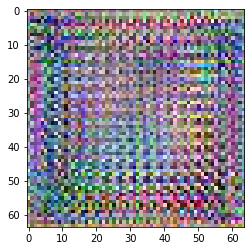

In [10]:
plt.imshow(np.array(ex))